> In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 70% and 30% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

 

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams['figure.figsize'] = (12.0, 9.0)

housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
# Preprocessing Input data
m = len(housing)
print("m: " + str(m))
print("shape of housing data: " + str(housing.shape))

housing.info()

m: 545
shape of housing data: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
# lisign string value to binary value for maping
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# define map function
def label_map(n):
    return n.map(
        {
        'no':0,
        'yes':1,
        }, 
    )

# applying the function to the housing list
housing[varlist] = housing[varlist].apply(label_map)

housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [5]:
# define cost function and gradient descent function
def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    cost = 1 / (2 * m) * np.sum(sqrErrors)
    return cost

def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta)
    return theta, cost_history


# Problem 1 (30 points)

#### 1a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

- area
- bedrooms
- bathrooms 
- stories
- parking

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [6]:
#Splitting the Data into Training and Evaluation Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)
print (df_train.shape)

print (df_test.shape)

(381, 13)
(164, 13)


### 1a Training

In [7]:
def cost_history_a(x, y):
    theta = np.zeros(6)
    iterations = 1500;
    # alpha = 0.01
    alpha = 0.00000000001; # avoiding overflowing, they are far away
    theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [8]:
# Setup variables
num_vars = ['area', 
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'parking',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

print (df_Newtrain.head())
print (df_Newtrain.shape)

print (df_Newtest.head())
print (df_Newtest.shape)


     area  bedrooms  bathrooms  stories  parking    price
126  7160         3          1        1        2  5880000
363  3584         2          1        1        0  3710000
370  4280         2          1        1        2  3640000
31   7000         3          1        4        2  8400000
113  9620         3          1        1        2  6083000
(381, 6)
     area  bedrooms  bathrooms  stories  parking    price
316  5900         4          2        2        1  4060000
77   6500         3          2        3        0  6650000
360  4040         2          1        1        0  3710000
90   5000         3          1        2        0  6440000
493  3960         3          1        1        0  2800000
(164, 6)


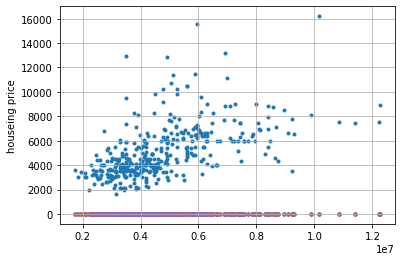

In [9]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
parking_T = df_Newtrain.values[:, 4]

price_T = df_Newtrain.values[:, 5] # price is y, the output of predication

m_T = len(price_T)

plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [10]:
xa_T = np.ones((m_T,1))
ya_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)

xa_T = np.hstack((xa_T, area_T, bedrooms_T, bathrooms_T, stories_T, parking_T))

### 1a Evaluation

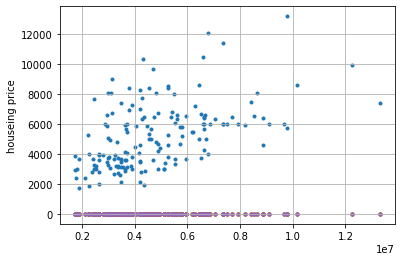

In [11]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
parking_E = df_Newtest.values[:, 4]

price_E = df_Newtest.values[:, 5] # price is y, the output of predication

m_E = len(price_E)

plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [12]:
xa_E = np.ones((m_E,1))
ya_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)

xa_E = np.hstack((xa_E, area_E, bedrooms_E, bathrooms_E, stories_E, parking_E))

## 1a Compare Results

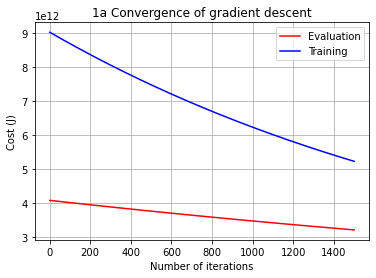

In [13]:
iterations_E, cost_history_E = cost_history_a(xa_E, price_E)
iterations_T, cost_history_T = cost_history_a(xa_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1a Convergence of gradient descent')
plt.legend()

#### 1b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

- area 
- bedrooms
- bathrooms
- stories
- mainroad 
- guestroom 
- basement
- hotwaterheating 
- airconditioning
- parking
- prefarea

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [14]:
def cost_history_b(x, y):
    theta = np.zeros(12)
    iterations = 1500;
    # alpha = 0.01
    alpha = 0.00000000001; # avoiding overflowing, they are far away
    theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [15]:
# Setup variables
num_vars = ['area',
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'mainroad',
            'guestroom',
            'basement',
            'hotwaterheating',
            'airconditioning',
            'parking',
            'prefarea',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# print (df_Newtrain.head())
# print (df_Newtrain.shape)

# print (df_Newtest.head())
# print (df_Newtest.shape)


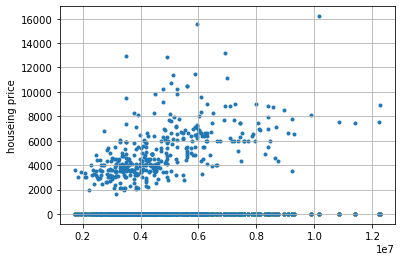

In [16]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
mainroad_T = df_Newtrain.values[:, 4]
guestrooms_T = df_Newtrain.values[:, 5]
basement_T = df_Newtrain.values[:, 6]
hotwaterheating_T = df_Newtrain.values[:, 7]
airconditioning_T = df_Newtrain.values[:, 8]
parking_T = df_Newtrain.values[:, 9]
prefarea_T = df_Newtrain.values[:, 10]

price_T = df_Newtrain.values[:, 11] # price is y, the output of predication


plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, mainroad_T, marker='.')
plt.scatter(price_T, guestrooms_T, marker='.')
plt.scatter(price_T, basement_T, marker='.')
plt.scatter(price_T, hotwaterheating_T, marker='.')
plt.scatter(price_T, airconditioning_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.scatter(price_T, prefarea_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

### 1b Training dataset

In [17]:
xb_T = np.ones((m_T,1))
yb_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
mainroad_T = mainroad_T.reshape(m_T,1)
guestrooms_T = guestrooms_T.reshape(m_T,1)
basement_T = basement_T.reshape(m_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(m_T,1)
airconditioning_T = airconditioning_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)
prefarea_T = prefarea_T.reshape(m_T,1)

xb_T = np.hstack((xb_T, 
                 area_T, 
                 bedrooms_T, 
                 bathrooms_T, 
                 stories_T, 
                 mainroad_T, 
                 guestrooms_T, 
                 basement_T, 
                 hotwaterheating_T, 
                 airconditioning_T, 
                 parking_T, 
                 prefarea_T))

### 1b Evaluation dataset

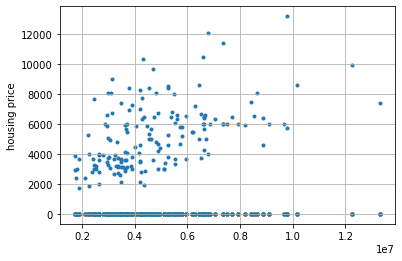

In [18]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
mainroad_E = df_Newtest.values[:, 4]
guestrooms_E = df_Newtest.values[:, 5]
basement_E = df_Newtest.values[:, 6]
hotwaterheating_E = df_Newtest.values[:, 7]
airconditioning_E = df_Newtest.values[:, 8]
parking_E = df_Newtest.values[:, 9]
prefarea_E = df_Newtest.values[:, 10]

price_E = df_Newtest.values[:, 11] # price is y, the output of predication


plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, mainroad_E, marker='.')
plt.scatter(price_E, guestrooms_E, marker='.')
plt.scatter(price_E, basement_E, marker='.')
plt.scatter(price_E, hotwaterheating_E, marker='.')
plt.scatter(price_E, airconditioning_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.scatter(price_E, prefarea_E, marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.ylabel('housing price')
plt.show()

In [19]:
xb_E = np.ones((m_E,1))
yb_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
mainroad_E = mainroad_E.reshape(m_E,1)
guestrooms_E = guestrooms_E.reshape(m_E,1)
basement_E = basement_E.reshape(m_E,1)
hotwaterheating_E = hotwaterheating_E.reshape(m_E,1)
airconditioning_E = airconditioning_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)
prefarea_E = prefarea_E.reshape(m_E,1)

xb_E = np.hstack((xb_E, 
                 area_E, 
                 bedrooms_E, 
                 bathrooms_E, 
                 stories_E, 
                 mainroad_E, 
                 guestrooms_E, 
                 basement_E, 
                 hotwaterheating_E, 
                 airconditioning_E, 
                 parking_E, 
                 prefarea_E))

## 1b Compare Result

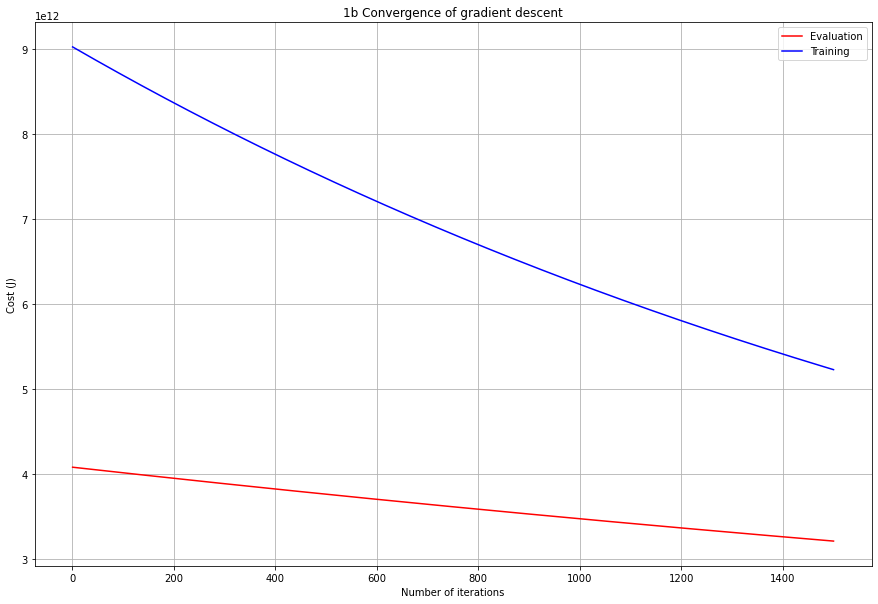

In [20]:
iterations_E, cost_history_E = cost_history_b(xb_E, price_E)
iterations_T, cost_history_T = cost_history_b(xb_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('1b Convergence of gradient descent')
plt.legend()

# Problem 2 (30 points)
#### 2a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

 

### 2a Training

In [21]:
def cost_history_a_rescaling(x, y):
    theta = np.zeros(6)
    iterations = 1500;
    alpha = 0.01;
    theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [22]:
# Setup variables
num_vars = ['area', 
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'parking',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]



# This time with Rescaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
# print(df_Newtrain.head(20))

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# print (df_Newtest.head(20))

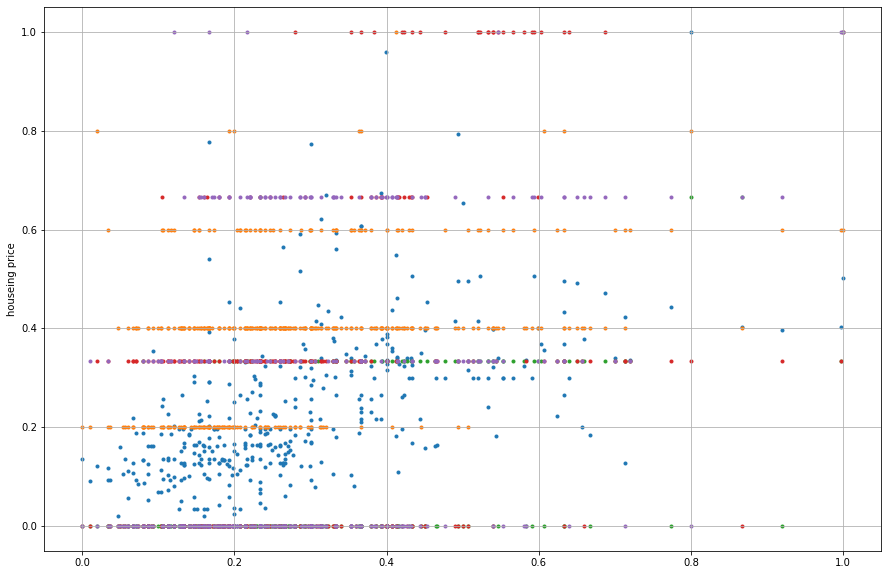

In [23]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
parking_T = df_Newtrain.values[:, 4]

price_T = df_Newtrain.values[:, 5] # price is y, the output of predication

m_T = len(price_T)

plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [24]:
xa_T = np.ones((m_T,1))
ya_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)

xa_T = np.hstack((xa_T, area_T, bedrooms_T, bathrooms_T, stories_T, parking_T))

### 2a Evaluation

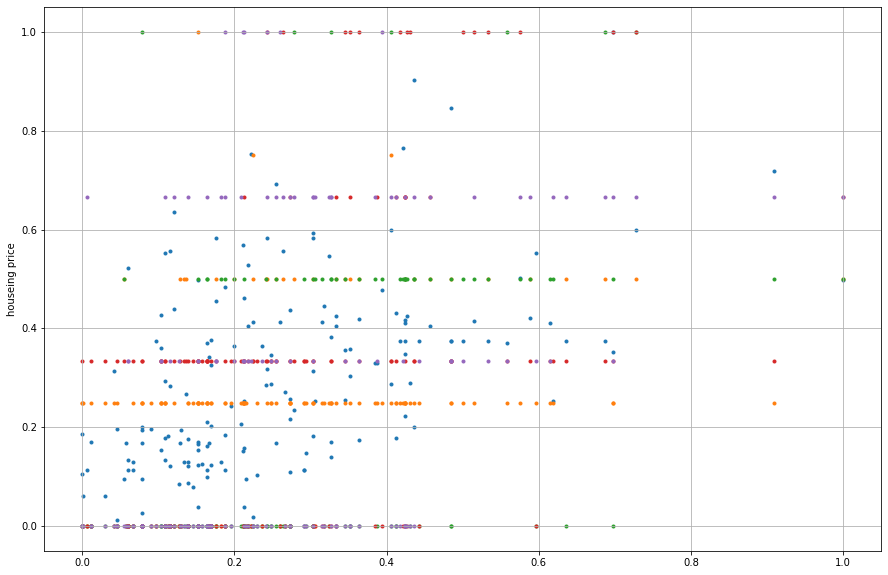

In [25]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
parking_E = df_Newtest.values[:, 4]

price_E = df_Newtest.values[:, 5] # price is y, the output of predication

m_E = len(price_E)

plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [26]:
xa_E = np.ones((m_E,1))
ya_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)

xa_E = np.hstack((xa_E, area_E, bedrooms_E, bathrooms_E, stories_E, parking_E))

## 2a Compare Results

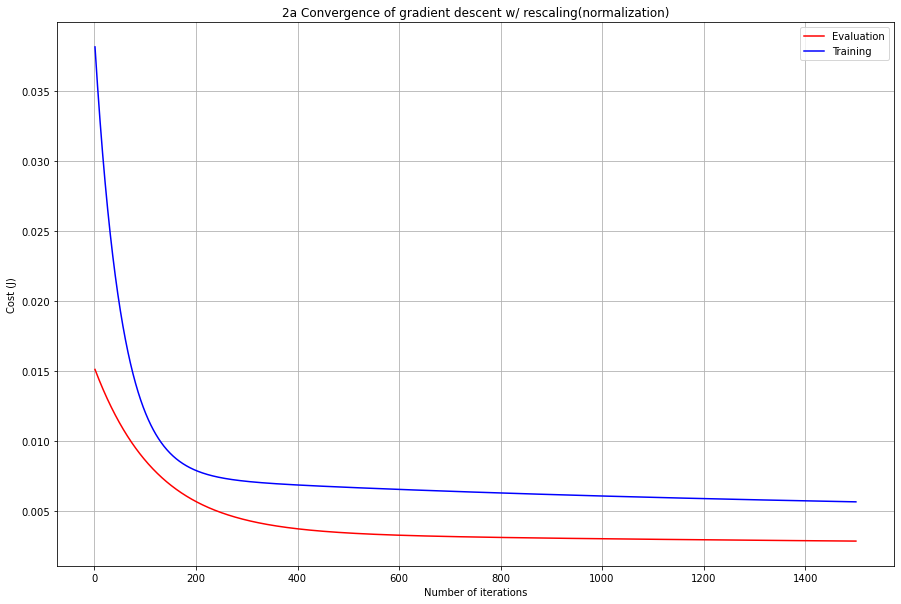

In [27]:
iterations_E, cost_history_E = cost_history_a_rescaling(xa_E, price_E)
iterations_T, cost_history_T = cost_history_a_rescaling(xa_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('2a Convergence of gradient descent w/ rescaling(normalization)')
plt.legend()

#### 2b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

### 2b Training

In [28]:
def cost_history_b_rescaling(x, y):
    theta = np.zeros(12)
    iterations = 1500;
    alpha = 0.01;
    theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [29]:
# Setup variables
num_vars = ['area',
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'mainroad',
            'guestroom',
            'basement',
            'hotwaterheating',
            'airconditioning',
            'parking',
            'prefarea',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]



# This time with Rescaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
# print(df_Newtrain.head(20))

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# print (df_Newtest.head(20))

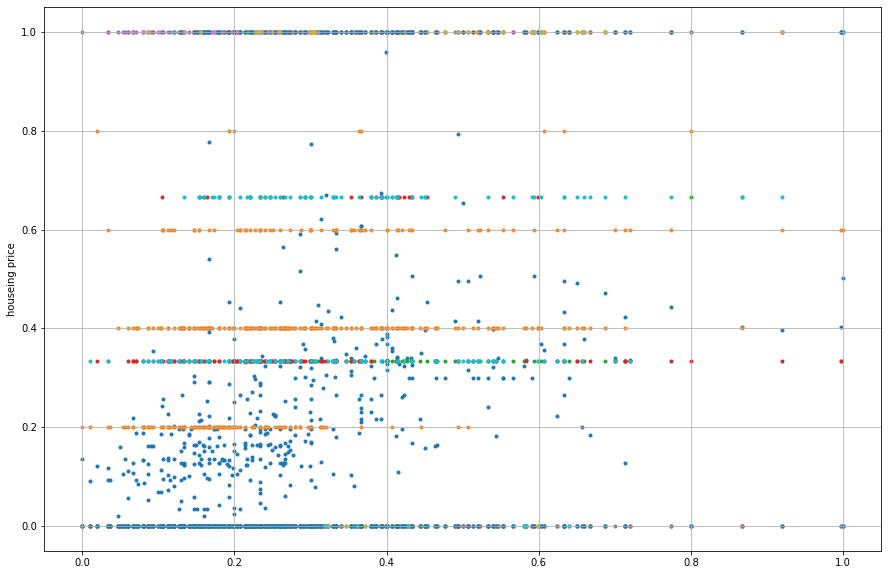

In [30]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
mainroad_T = df_Newtrain.values[:, 4]
guestrooms_T = df_Newtrain.values[:, 5]
basement_T = df_Newtrain.values[:, 6]
hotwaterheating_T = df_Newtrain.values[:, 7]
airconditioning_T = df_Newtrain.values[:, 8]
parking_T = df_Newtrain.values[:, 9]
prefarea_T = df_Newtrain.values[:, 10]

price_T = df_Newtrain.values[:, 11] # price is y, the output of predication


plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, mainroad_T, marker='.')
plt.scatter(price_T, guestrooms_T, marker='.')
plt.scatter(price_T, basement_T, marker='.')
plt.scatter(price_T, hotwaterheating_T, marker='.')
plt.scatter(price_T, airconditioning_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.scatter(price_T, prefarea_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [31]:
xb_T = np.ones((m_T,1))
yb_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
mainroad_T = mainroad_T.reshape(m_T,1)
guestrooms_T = guestrooms_T.reshape(m_T,1)
basement_T = basement_T.reshape(m_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(m_T,1)
airconditioning_T = airconditioning_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)
prefarea_T = prefarea_T.reshape(m_T,1)

xb_T = np.hstack((xb_T, 
                 area_T, 
                 bedrooms_T, 
                 bathrooms_T, 
                 stories_T, 
                 mainroad_T, 
                 guestrooms_T, 
                 basement_T, 
                 hotwaterheating_T, 
                 airconditioning_T, 
                 parking_T, 
                 prefarea_T))

### 2b Evaluation

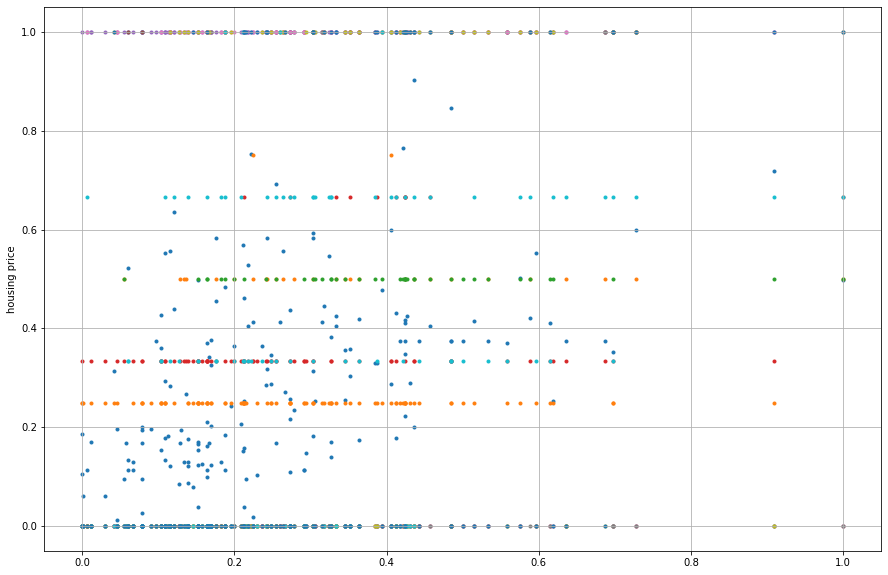

In [32]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
mainroad_E = df_Newtest.values[:, 4]
guestrooms_E = df_Newtest.values[:, 5]
basement_E = df_Newtest.values[:, 6]
hotwaterheating_E = df_Newtest.values[:, 7]
airconditioning_E = df_Newtest.values[:, 8]
parking_E = df_Newtest.values[:, 9]
prefarea_E = df_Newtest.values[:, 10]

price_E = df_Newtest.values[:, 11] # price is y, the output of predication


plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, mainroad_E, marker='.')
plt.scatter(price_E, guestrooms_E, marker='.')
plt.scatter(price_E, basement_E, marker='.')
plt.scatter(price_E, hotwaterheating_E, marker='.')
plt.scatter(price_E, airconditioning_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.scatter(price_E, prefarea_E, marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.ylabel('housing price')
plt.show()

In [33]:
xb_E = np.ones((m_E,1))
yb_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
mainroad_E = mainroad_E.reshape(m_E,1)
guestrooms_E = guestrooms_E.reshape(m_E,1)
basement_E = basement_E.reshape(m_E,1)
hotwaterheating_E = hotwaterheating_E.reshape(m_E,1)
airconditioning_E = airconditioning_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)
prefarea_E = prefarea_E.reshape(m_E,1)

xb_E = np.hstack((xb_E, 
                 area_E, 
                 bedrooms_E, 
                 bathrooms_E, 
                 stories_E, 
                 mainroad_E, 
                 guestrooms_E, 
                 basement_E, 
                 hotwaterheating_E, 
                 airconditioning_E, 
                 parking_E, 
                 prefarea_E))

## 2b Compare Result

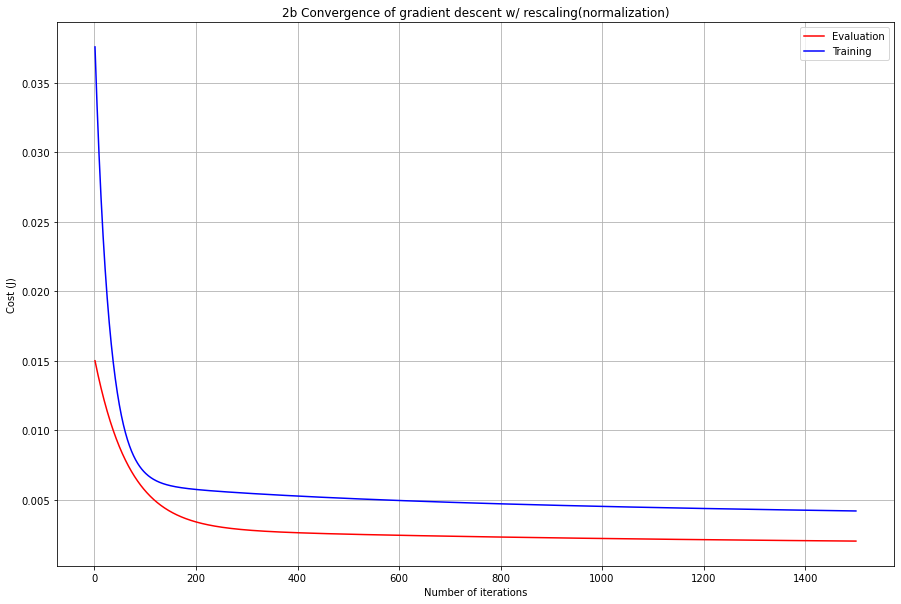

In [34]:
iterations_E, cost_history_E = cost_history_b_rescaling(xb_E, price_E)
iterations_T, cost_history_T = cost_history_b_rescaling(xb_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('2b Convergence of gradient descent w/ rescaling(normalization)')
plt.legend()

# Problem 3 (40 points)

#### 3a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set. 
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 

In [35]:
def gradient_descent_w_penalty(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        lamda = 10 
        # lamda = 100
        # lamda = 1000
        sum_delta = ((alpha / m) * x.transpose().dot(errors))+((lamda/m)*theta);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta)
    return theta, cost_history

### 3a Training

In [36]:
def cost_history_a_penalty(x, y):
    theta = np.zeros(6)
    iterations = 1500;
    alpha = 0.01
    theta, cost_history = gradient_descent_w_penalty(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [37]:
# Setup variables
num_vars = ['area', 
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'parking',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]



# This time with Rescaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
# print(df_Newtrain.head(20))

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# print (df_Newtest.head(20))

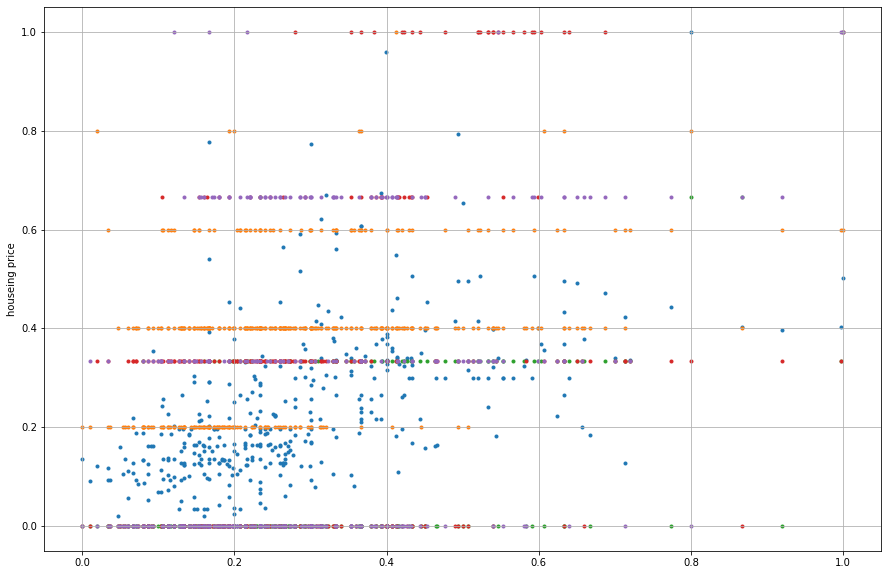

In [38]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
parking_T = df_Newtrain.values[:, 4]

price_T = df_Newtrain.values[:, 5] # price is y, the output of predication

m_T = len(price_T)

plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [39]:
xa_T = np.ones((m_T,1))
ya_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)

xa_T = np.hstack((xa_T, area_T, bedrooms_T, bathrooms_T, stories_T, parking_T))

### 3a Evaluation

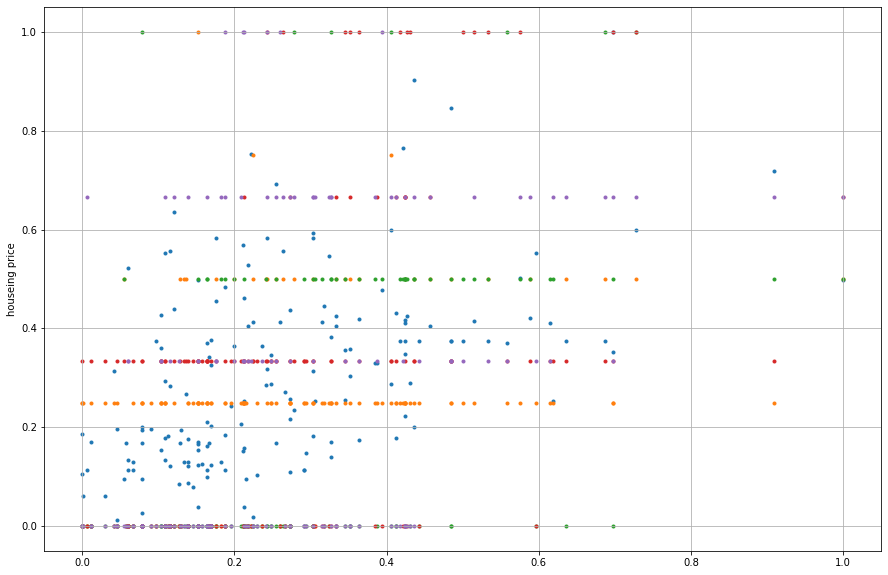

In [40]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
parking_E = df_Newtest.values[:, 4]

price_E = df_Newtest.values[:, 5] # price is y, the output of predication

m_E = len(price_E)

plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [41]:
xa_E = np.ones((m_E,1))
ya_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)

xa_E = np.hstack((xa_E, area_E, bedrooms_E, bathrooms_E, stories_E, parking_E))

## 3a Compare Results

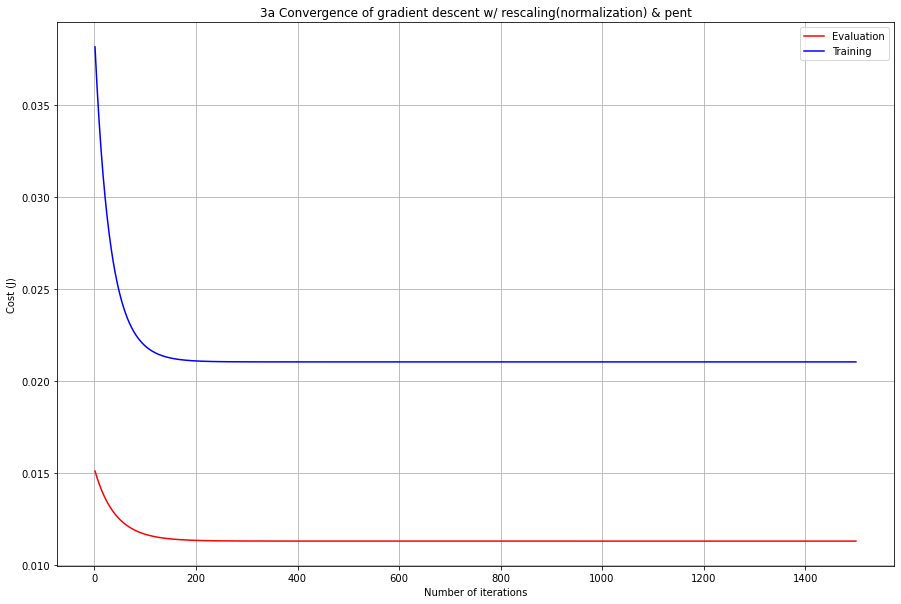

In [42]:
iterations_E, cost_history_E = cost_history_a_penalty(xa_E, price_E)
iterations_T, cost_history_T = cost_history_a_penalty(xa_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('3a Convergence of gradient descent w/ rescaling(normalization) & pent')
plt.legend()

#### 3b) Repeat problem 2b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set. 
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

### 3b Training

In [43]:
def cost_history_b_penalty(x, y):
    theta = np.zeros(12)
    iterations = 1500;
    alpha = 0.01
    theta, cost_history = gradient_descent_w_penalty(x, y, theta, alpha, iterations)
    
    return iterations, cost_history

In [44]:
# Setup variables
num_vars = ['area',
            'bedrooms', 
            'bathrooms', 
            'stories', 
            'mainroad',
            'guestroom',
            'basement',
            'hotwaterheating',
            'airconditioning',
            'parking',
            'prefarea',
            'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]



# This time with Rescaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
# print(df_Newtrain.head(20))

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# print (df_Newtest.head(20))

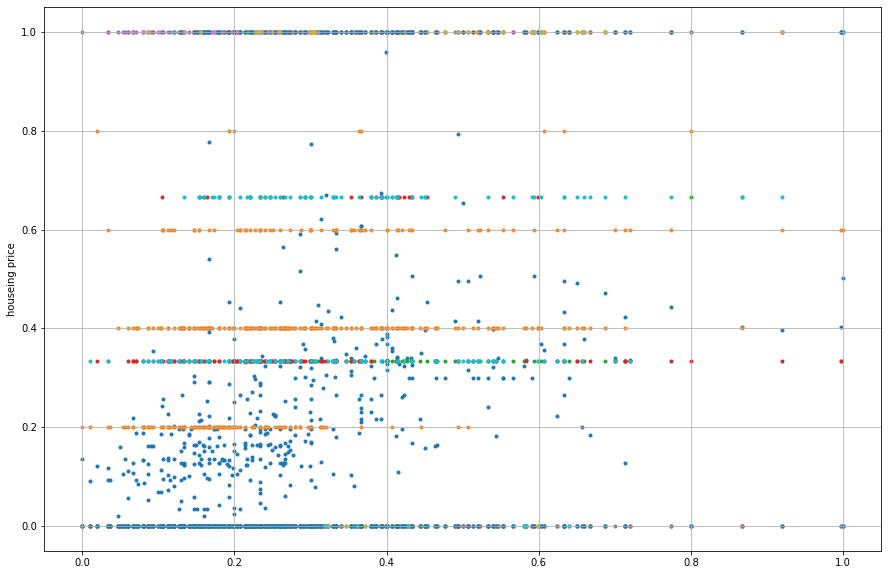

In [45]:
area_T = df_Newtrain.values[:, 0]
bedrooms_T = df_Newtrain.values[:, 1]
bathrooms_T = df_Newtrain.values[:, 2]
stories_T = df_Newtrain.values[:, 3]
mainroad_T = df_Newtrain.values[:, 4]
guestrooms_T = df_Newtrain.values[:, 5]
basement_T = df_Newtrain.values[:, 6]
hotwaterheating_T = df_Newtrain.values[:, 7]
airconditioning_T = df_Newtrain.values[:, 8]
parking_T = df_Newtrain.values[:, 9]
prefarea_T = df_Newtrain.values[:, 10]

price_T = df_Newtrain.values[:, 11] # price is y, the output of predication


plt.scatter(price_T, area_T, marker='.')
plt.scatter(price_T, bedrooms_T, marker='.')
plt.scatter(price_T, bathrooms_T, marker='.')
plt.scatter(price_T, stories_T, marker='.')
plt.scatter(price_T, mainroad_T, marker='.')
plt.scatter(price_T, guestrooms_T, marker='.')
plt.scatter(price_T, basement_T, marker='.')
plt.scatter(price_T, hotwaterheating_T, marker='.')
plt.scatter(price_T, airconditioning_T, marker='.')
plt.scatter(price_T, parking_T, marker='.')
plt.scatter(price_T, prefarea_T, marker='.')
plt.grid()
plt.ylabel('houseing price')
plt.show()

In [46]:
xb_T = np.ones((m_T,1))
yb_T = price_T

area_T = area_T.reshape(m_T,1)
bedrooms_T = bedrooms_T.reshape(m_T,1)
bathrooms_T = bathrooms_T.reshape(m_T,1)
stories_T = stories_T.reshape(m_T,1)
mainroad_T = mainroad_T.reshape(m_T,1)
guestrooms_T = guestrooms_T.reshape(m_T,1)
basement_T = basement_T.reshape(m_T,1)
hotwaterheating_T = hotwaterheating_T.reshape(m_T,1)
airconditioning_T = airconditioning_T.reshape(m_T,1)
parking_T = parking_T.reshape(m_T,1)
prefarea_T = prefarea_T.reshape(m_T,1)

xb_T = np.hstack((xb_T, 
                 area_T, 
                 bedrooms_T, 
                 bathrooms_T, 
                 stories_T, 
                 mainroad_T, 
                 guestrooms_T, 
                 basement_T, 
                 hotwaterheating_T, 
                 airconditioning_T, 
                 parking_T, 
                 prefarea_T))

### 3b Evaluation

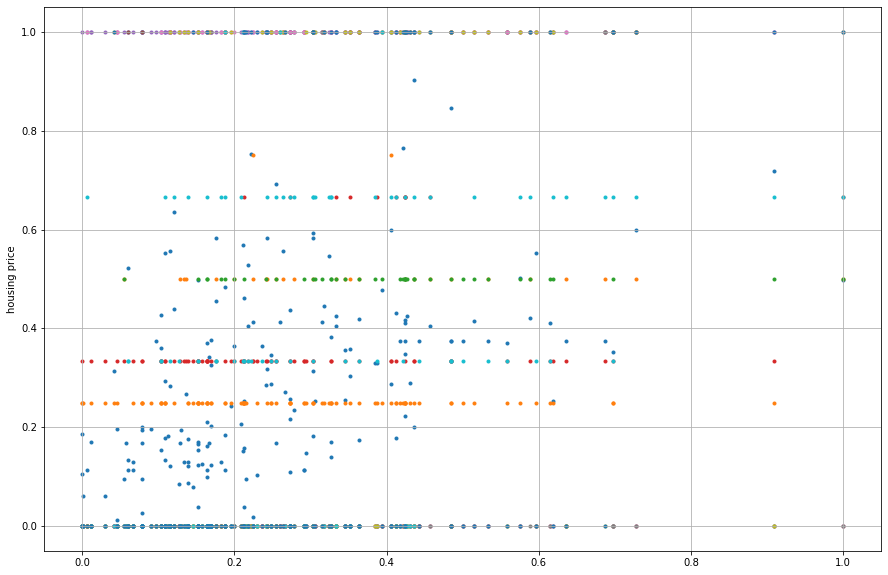

In [47]:
area_E = df_Newtest.values[:, 0]
bedrooms_E = df_Newtest.values[:, 1]
bathrooms_E = df_Newtest.values[:, 2]
stories_E = df_Newtest.values[:, 3]
mainroad_E = df_Newtest.values[:, 4]
guestrooms_E = df_Newtest.values[:, 5]
basement_E = df_Newtest.values[:, 6]
hotwaterheating_E = df_Newtest.values[:, 7]
airconditioning_E = df_Newtest.values[:, 8]
parking_E = df_Newtest.values[:, 9]
prefarea_E = df_Newtest.values[:, 10]

price_E = df_Newtest.values[:, 11] # price is y, the output of predication


plt.scatter(price_E, area_E, marker='.')
plt.scatter(price_E, bedrooms_E, marker='.')
plt.scatter(price_E, bathrooms_E, marker='.')
plt.scatter(price_E, stories_E, marker='.')
plt.scatter(price_E, mainroad_E, marker='.')
plt.scatter(price_E, guestrooms_E, marker='.')
plt.scatter(price_E, basement_E, marker='.')
plt.scatter(price_E, hotwaterheating_E, marker='.')
plt.scatter(price_E, airconditioning_E, marker='.')
plt.scatter(price_E, parking_E, marker='.')
plt.scatter(price_E, prefarea_E, marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.ylabel('housing price')
plt.show()

In [48]:
xb_E = np.ones((m_E,1))
yb_E = price_E

area_E = area_E.reshape(m_E,1)
bedrooms_E = bedrooms_E.reshape(m_E,1)
bathrooms_E = bathrooms_E.reshape(m_E,1)
stories_E = stories_E.reshape(m_E,1)
mainroad_E = mainroad_E.reshape(m_E,1)
guestrooms_E = guestrooms_E.reshape(m_E,1)
basement_E = basement_E.reshape(m_E,1)
hotwaterheating_E = hotwaterheating_E.reshape(m_E,1)
airconditioning_E = airconditioning_E.reshape(m_E,1)
parking_E = parking_E.reshape(m_E,1)
prefarea_E = prefarea_E.reshape(m_E,1)

xb_E = np.hstack((xb_E, 
                 area_E, 
                 bedrooms_E, 
                 bathrooms_E, 
                 stories_E, 
                 mainroad_E, 
                 guestrooms_E, 
                 basement_E, 
                 hotwaterheating_E, 
                 airconditioning_E, 
                 parking_E, 
                 prefarea_E))

## 3b Compare Results

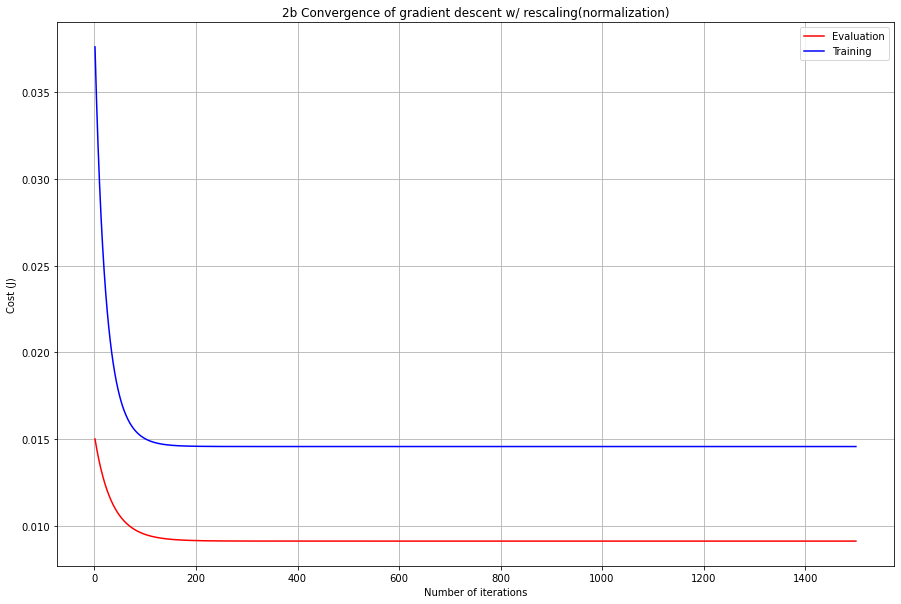

In [49]:
iterations_E, cost_history_E = cost_history_b_penalty(xb_E, price_E)
iterations_T, cost_history_T = cost_history_b_penalty(xb_T, price_T)
plt.plot(range(1, iterations_E + 1), cost_history_E, color='red', label='Evaluation')
plt.plot(range(1, iterations_T + 1), cost_history_T, color='blue', label='Training')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('2b Convergence of gradient descent w/ rescaling(normalization)')
plt.legend()